### [A Gentle Introduction to Exploratory Data Analysis](https://www.mrdbourke.com/a-gentle-introduction-to-exploratory-data-analysis/)

#### An EDA checklist
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(14,9)})
from sklearn.datasets import fetch_openml

In [ ]:
titanic = fetch_openml("titanic", version=1, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
data = titanic["frame"]
data["survived"] = titanic["target"].astype(int)

In [ ]:
data.drop(columns=["boat", "body"], inplace=True)

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
report = ProfileReport(data, explorative=True)

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

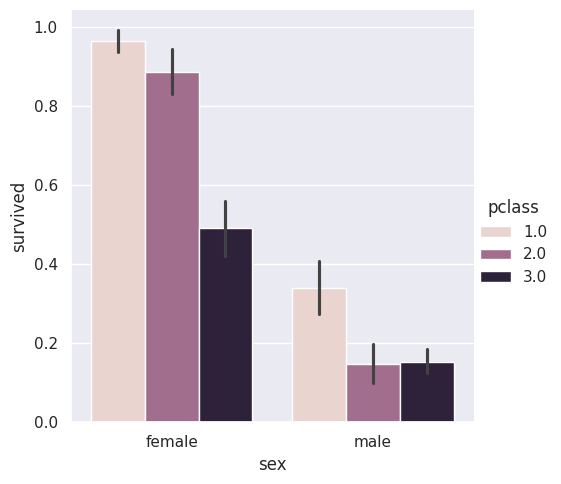

In [ ]:
sns.catplot(data=data, x="sex", y="survived", hue='pclass', kind="bar")

Be aware of [Data Leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)):

In [ ]:
pd.crosstab(data["survived"], (~data["boat"].isna()).astype(int))

boat,0,1
survived,,
0,800,9
1,23,477


---

## Prepare data based on their types

![types of data](https://i1.wp.com/basicmedicalkey.com/wp-content/uploads/2017/05/c01f001.jpg?zoom=2&w=960)

### Numerical variables
* normalization
* check for outliers

### Categorical variables
* label encoding or one hot encoding

![le vs ohe](https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W.)

In [ ]:
1*w + ...=,2*w+ ...=,3*w+ ...=
1*w1 + 0*w2 + 0*w3
0*w1 + 1*w2 + 0*w3
0*w1 + 0*w2 + 1*w3
w1/w2/w3=1/2/3=1/2.5/5

#### Normalization (log transformation)

(<seaborn.axisgrid.FacetGrid at 0x7fa1a3272090>,
 <seaborn.axisgrid.FacetGrid at 0x7fa1a3061610>)

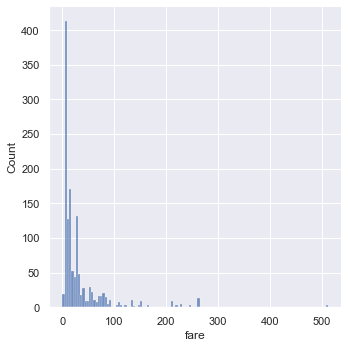

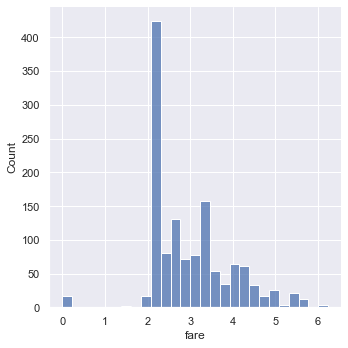

In [ ]:
sns.displot(data["fare"]), sns.displot(np.log1p(data["fare"]))

In [ ]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


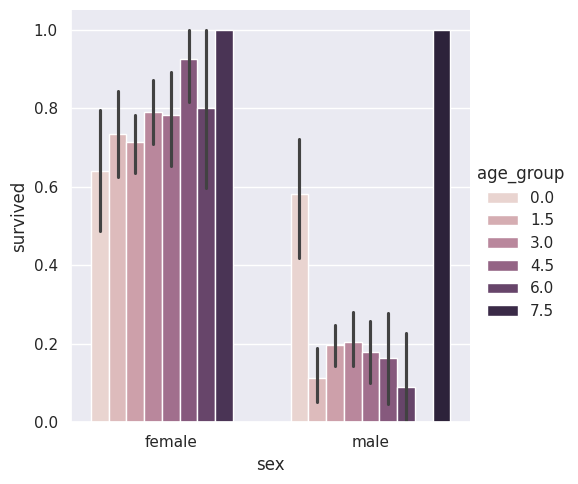

In [ ]:
sns.catplot(data=data, x="sex", y="survived", hue='age_group', kind="bar")

In [ ]:
data["age_group"] = data["age"] // 10

In [ ]:
data.groupby(["sex", "age_group"]).agg(
    target_mean=("survived", "mean"),
    n_pass=("name", "count")
)

target_mean  n_pass
sex    age_group                     
female 0.0           0.641026      39
       1.0           0.734375      64
       2.0           0.713043     115
       3.0           0.790698      86
       4.0           0.782609      46
       5.0           0.925926      27
       6.0           0.800000      10
       7.0           1.000000       1
       8.0                NaN       0
male   0.0           0.581395      43
       1.0           0.113924      79
       2.0           0.196507     229
       3.0           0.205479     146
       4.0           0.179775      89
       5.0           0.162791      43
       6.0           0.090909      22
       7.0           0.000000       6
       8.0           1.000000       1

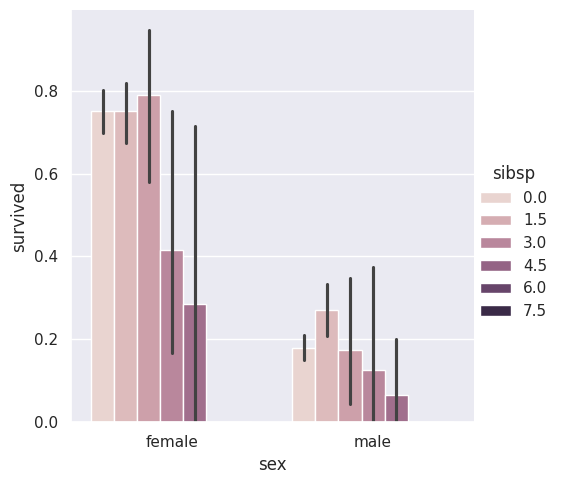

In [ ]:
sns.catplot(data=data, x="sex", y="survived", hue='sibsp', kind="bar")

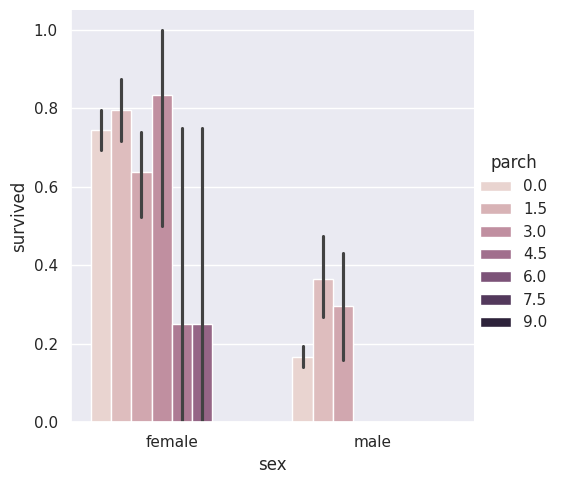

In [ ]:
sns.catplot(data=data, x="sex", y="survived", hue='parch', kind="bar")

In [ ]:
data.loc[data["cabin"].notnull(), "cabin"].apply(lambda x: str(x)[0]).value_counts()

cabin
C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: count, dtype: int64

In [ ]:
data["cabin_group"] = None
data.loc[data["cabin"].notnull(),"cabin_group"] = data.loc[data["cabin"].notnull(), "cabin"].apply(lambda x: str(x)[0])

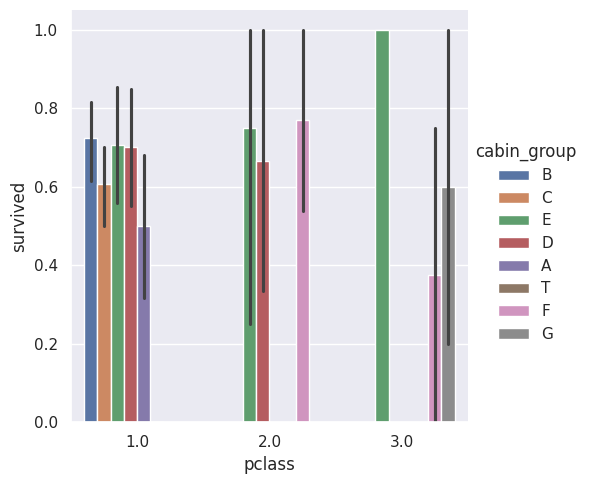

In [ ]:
sns.catplot(data=data, x="pclass", y="survived", hue='cabin_group', kind="bar")

In [ ]:
data.groupby(["pclass"])["cabin_group"].unique()

pclass
1.0    [B, C, E, D, A, None, T]
2.0             [None, D, F, E]
3.0             [None, F, E, G]
Name: cabin_group, dtype: object

In [ ]:
data["n_names"] = data["name"].apply(lambda x: len(x.split(" ")))

In [ ]:
data[["n_names", "survived"]].corr()

,n_names,survived
n_names,1.00000,0.31054
survived,0.31054,1.00000


In [ ]:
data.groupby(["sex","n_names"]).agg(
    target_mean=("survived", "mean"),
    n=("survived", "count")
)

target_mean    n
sex    n_names                  
female 3           0.645455  110
       4           0.736486  148
       5           0.651515   66
       6           0.800000   70
       7           0.870370   54
       8           0.687500   16
       9           1.000000    1
       14          1.000000    1
male   3           0.141593  339
       4           0.200000  410
       5           0.307692   78
       6           0.454545   11
       7           0.400000    5
       8                NaN    0
       9                NaN    0
       14               NaN    0